In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [5]:
adults = pd.read_csv('Data/2023_adult_features.csv')
#adults["collection_date"] = pd.to_datetime(adults["collection_date"], format="%m/%d/%y") 
adults

,Unnamed: 0,card_id,data_collector,record_id,collection_date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,...,mn_ppm,b_ppm,al_ppm,s_ppm,morgan_p_lb_a,morgan_k_lb_a,morgan_ca_lb_a,morgan_mg_lb_a,latitude,longitude
0,0,2246,Janice Degni,DEG_DIE_HILL,2023-04-21,16.0,10.0,7.0,5.0,0.0,...,33.9,0.3,1546,26,13.9,695.0,2233.2,233.2,42.602460,-76.149470
1,1,2266,Janice Degni,DEG_DIE_HILL,2023-04-27,43.0,9.0,51.0,12.0,0.0,...,33.9,0.3,1546,26,13.9,695.0,2233.2,233.2,42.602460,-76.149470
2,2,2374,Janice Degni,DEG_DIE_HILL,2023-05-04,40.0,20.0,136.0,128.0,9.0,...,33.9,0.3,1546,26,13.9,695.0,2233.2,233.2,42.602460,-76.149470
3,3,2560,Janice Degni,DEG_DIE_HILL,2023-05-11,80.0,18.0,36.0,15.0,3.0,...,33.9,0.3,1546,26,13.9,695.0,2233.2,233.2,42.602460,-76.149470
4,4,2558,Janice Degni,DEG_DIE_HILL,2023-05-18,21.0,0.0,4.0,3.0,0.0,...,33.9,0.3,1546,26,13.9,695.0,2233.2,233.2,42.602460,-76.149470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,397,2270,Marion Zuefle,ZUE_REE,2023-04-19,1.0,2.0,4.0,1.0,0.0,...,116.4,0.6,716,21,1.0,154.5,2701.6,388.8,42.783407,-76.983286
398,398,2272,Marion Zuefle,ZUE_REE,2023-04-26,44.0,34.0,21.0,34.0,0.0,...,116.4,0.6,716,21,1.0,154.5,2701.6,388.8,42.783407,-76.983286
399,399,2384,Marion Zuefle,ZUE_REE,2023-05-02,45.0,47.0,27.0,46.0,3.0,...,116.4,0.6,716,21,1.0,154.5,2701.6,388.8,42.783407,-76.983286
400,400,2552,Marion Zuefle,ZUE_REE,2023-05-17,38.0,21.0,5.0,3.0,4.0,...,116.4,0.6,716,21,1.0,154.5,2701.6,388.8,42.783407,-76.983286


In [ ]:
dummies = pd.get_dummies(
    data=adults,
    columns=[
        "data_collector",
        "record_id",
        "previous_crop",
        "cover_crop",
        "manure",
        "tillage",
        "muid",
        "hsg",
    ],
)
merged = pd.concat([adults, dummies], axis="columns")
merged = merged.T.drop_duplicates().T
merged = merged.drop(
    [
        "data_collector",
        "record_id",
        "previous_crop",
        "cover_crop",
        "manure",
        "tillage",
        "muid",
        "hsg",
        "card_id",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "week",
        "total_f_scm",
        "total_m_scm",
    ],
    axis="columns",
)
merged["day_of_year"] = adults["collection_date"].dt.dayofyear
merged = merged.drop("collection_date", axis=1)
merged

,total_scm,min_temp_f_1_week,ave_temp_f_1_week,max_temp_f_1_week,mean_dew_point_1_week,vpd_min_1_week,vpd_max_1_week,rain_inches_1_week,min_temp_f_2_week,ave_temp_f_2_week,...,muid_NY129,muid_NY131,muid_NY134,muid_NY138,muid_NY142,muid_NY149,hsg_A,hsg_B,hsg_C,day_of_year
0,38,40.825,52.8125,64.8,40.15,0.84875,14.81875,0.62,36.453333,48.846667,...,False,False,False,False,False,False,False,False,True,111
1,115,36.15,46.525,56.8875,36.8125,0.565,10.19875,0.74,39.513333,51.126667,...,False,False,False,False,False,False,False,False,True,117
2,324,37.7375,44.675,51.6125,38.775,0.31875,5.09375,3.15,37.193333,45.886667,...,False,False,False,False,False,False,False,False,True,124
3,149,36.6125,47.925,59.25,37.525,0.3,10.51125,0.38,37.206667,46.666667,...,False,False,False,False,False,False,False,False,True,131
4,28,37.45,51.8125,66.2,35.9375,0.745,16.07125,0.0,37.013333,49.786667,...,False,False,False,False,False,False,False,False,True,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,8,47.8,60.05,72.3125,42.3875,2.8325,20.01,0.38,41.393333,53.1,...,False,True,False,False,False,False,True,False,False,109
398,133,38.75,47.7625,56.8,37.375,0.835,10.20625,1.15,43.806667,54.886667,...,False,True,False,False,False,False,True,False,False,116
399,165,38.4625,46.125,53.7625,39.475,0.42625,5.83875,1.95,39.04,47.613333,...,False,True,False,False,False,False,True,False,False,122
400,67,45.5875,57.9,70.2125,38.1,3.31625,18.68125,0.0,43.186667,53.94,...,False,True,False,False,False,False,True,False,False,137


In [ ]:
X = merged.drop(['total_scm'], axis=1)
y = merged['total_scm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
lreg = LinearRegression()

In [ ]:
lreg.fit(X_train,y_train)
# predicting on cv
pred_cv = lreg.predict(X_test)
# calculating mse
mse = np.mean((pred_cv - y_test)**2)
mse

2980.454923298518

In [ ]:
lreg.score(X_test,y_test)

0.16453290845210833

Text(0.5, 1.0, 'Residual plot')

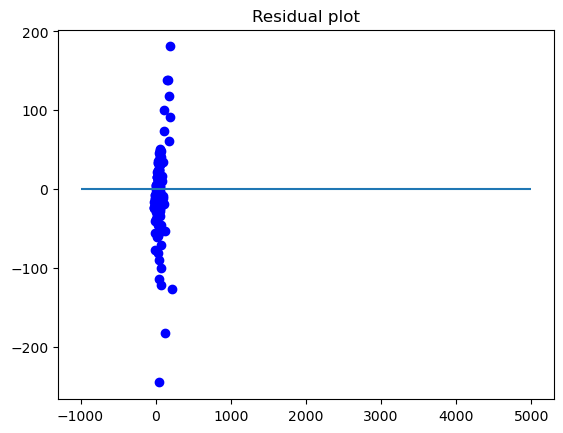

In [ ]:
x_plot = plt.scatter(pred_cv, (pred_cv - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

<Axes: title={'center': 'Model Coefficients'}>

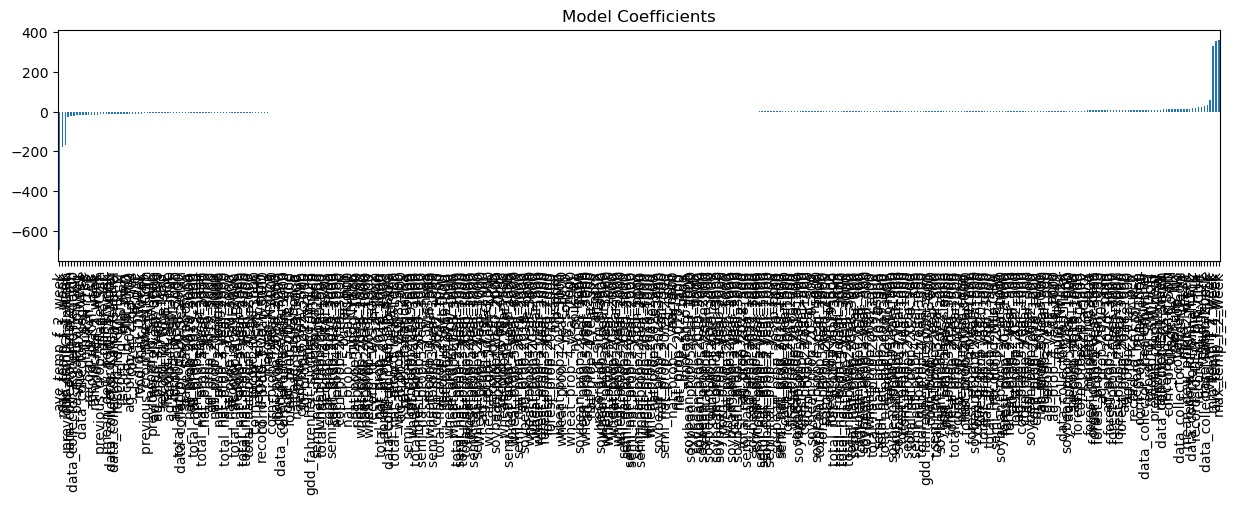

In [ ]:
plt.figure(figsize=(15,3))
predictors = X_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [ ]:
ridgeReg = Ridge(alpha=0.5)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)
mse = np.mean((pred_cv - y_test)**2)
ridgeReg.score(X_test,y_test) 

0.15469968684712432